In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import json
import math
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

In [2]:
list_of_devices = []

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = devicesDf.groupby('Hour')

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
X = np.array(devicesDf.drop(['Device_id', 'Request_size'], axis = 1))

#linkage = sch.linkage(X, method  = "ward")

hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')

y_hc=hc.fit_predict(X)


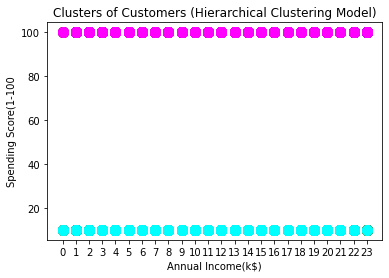

In [3]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

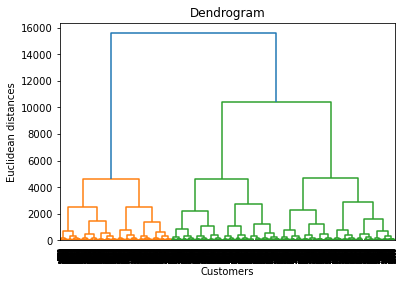

In [8]:
dendrogram = sch.dendrogram(linkage)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()